# HOUSE PRICE PREDICTION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import klib
import warnings
warnings.filterwarnings("ignore")


#To show all the columns of datasets
pd.set_option('display.max_columns', None)

# Working on Train data

In [2]:
df1=pd.read_csv("train1.csv")

In [3]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df1.shape

(1460, 81)

## Handling Missing Values in Data

<AxesSubplot:>

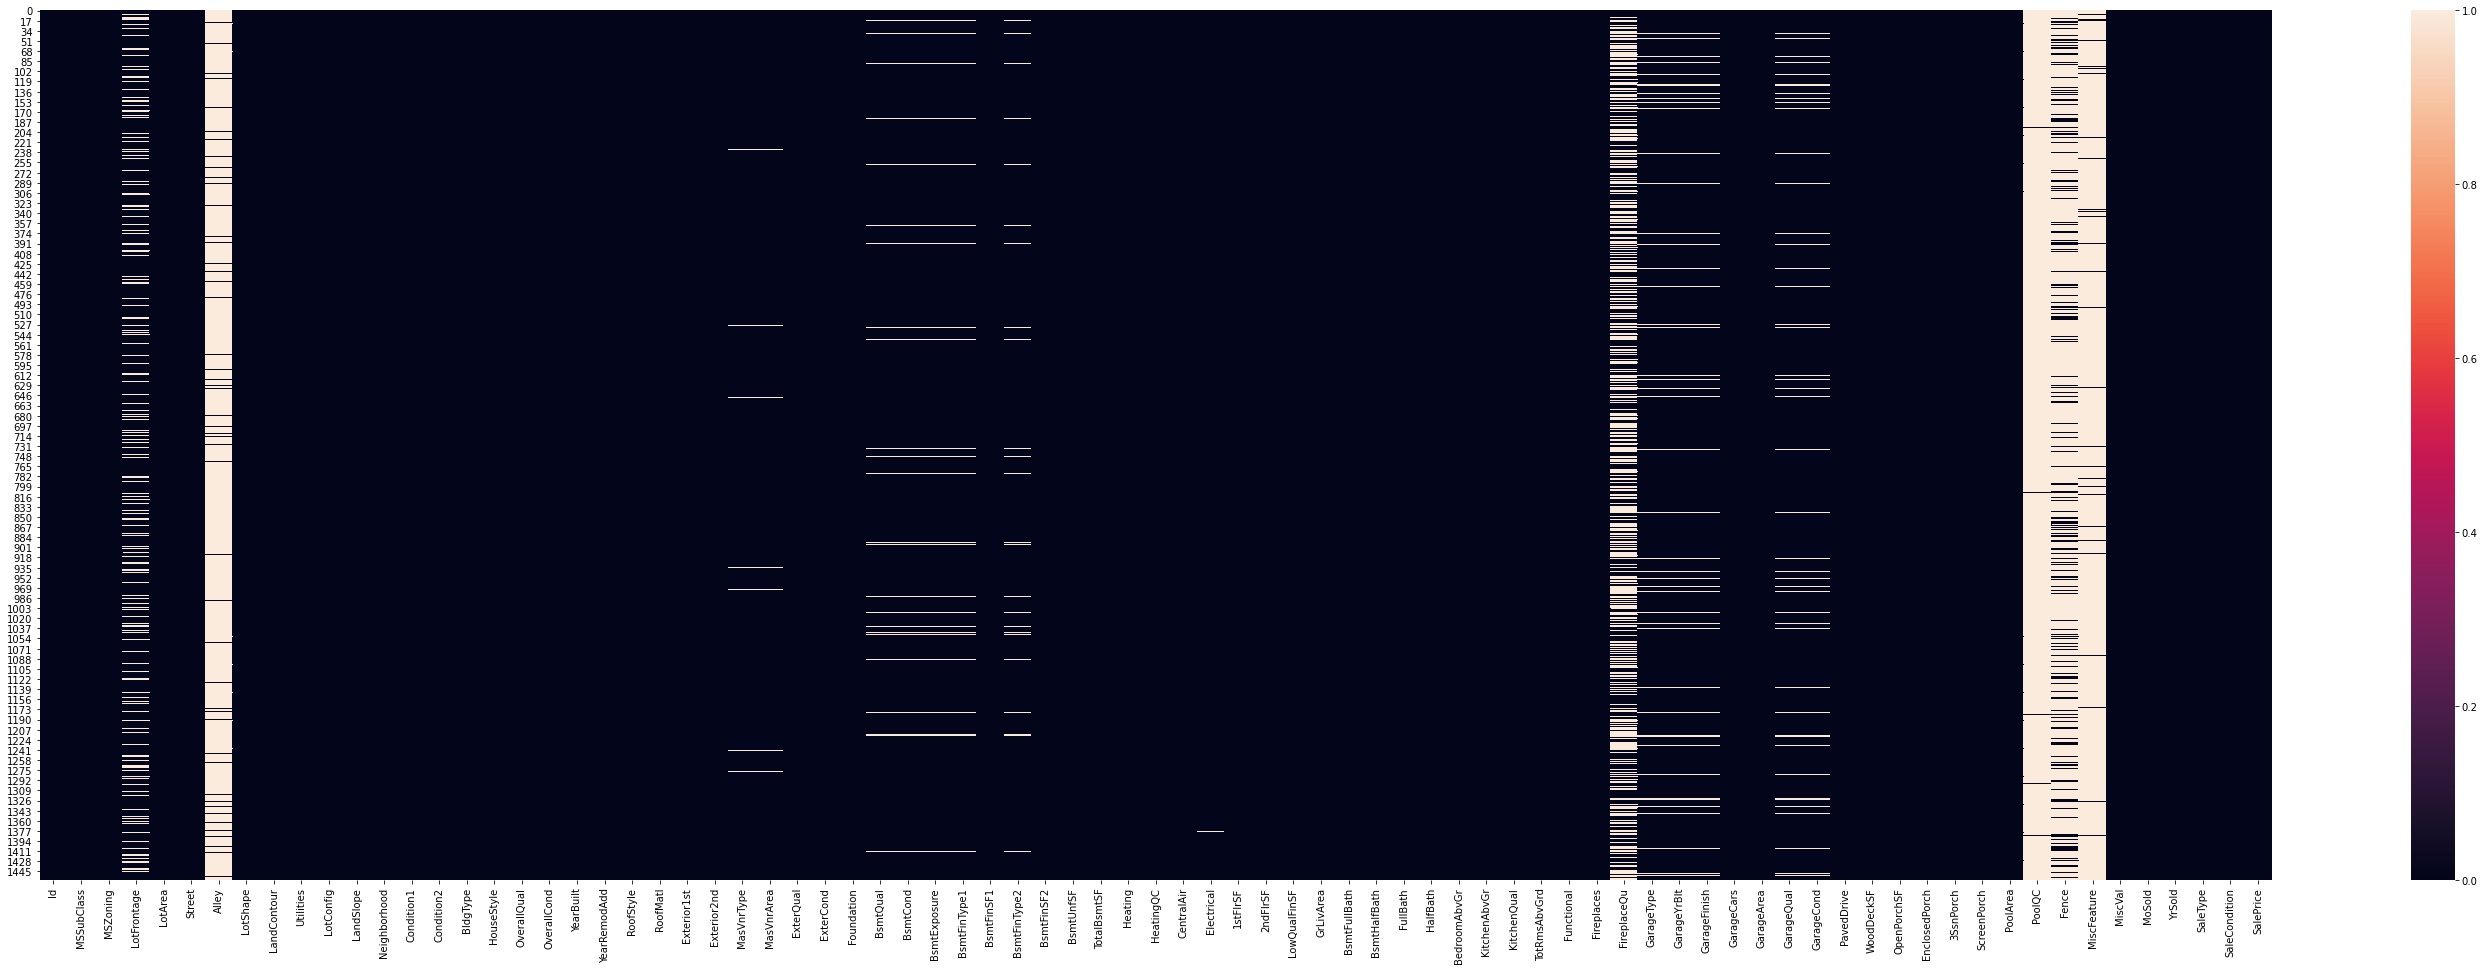

In [6]:
plt.figure(figsize=(50,16))
sns.heatmap(df1.isnull())

In [7]:
feature_na=[feature for feature in df1.columns if df1[feature].isnull().sum()>1]

for feature in feature_na:
    print(feature,np.round(df1[feature].isnull().mean(),5),'<--missing value %')

LotFrontage 0.1774 <--missing value %
Alley 0.93767 <--missing value %
MasVnrType 0.00548 <--missing value %
MasVnrArea 0.00548 <--missing value %
BsmtQual 0.02534 <--missing value %
BsmtCond 0.02534 <--missing value %
BsmtExposure 0.02603 <--missing value %
BsmtFinType1 0.02534 <--missing value %
BsmtFinType2 0.02603 <--missing value %
FireplaceQu 0.4726 <--missing value %
GarageType 0.05548 <--missing value %
GarageYrBlt 0.05548 <--missing value %
GarageFinish 0.05548 <--missing value %
GarageQual 0.05548 <--missing value %
GarageCond 0.05548 <--missing value %
PoolQC 0.99521 <--missing value %
Fence 0.80753 <--missing value %
MiscFeature 0.96301 <--missing value %


In [8]:
df1.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [9]:
df1.drop(["PoolQC","MiscFeature","Alley","Fence"],inplace=True,axis=1)

In [10]:
numeric_data = df1.select_dtypes(include=[np.number])
categorical_data = df1.select_dtypes(exclude=[np.number])

In [11]:
for c in categorical_data.columns:
    df1[c].fillna('NA', inplace=True)
    
df1['MasVnrType'].fillna('None', inplace=True)    

In [12]:
for c in numeric_data.columns:
    df1[c].fillna(0, inplace=True)

In [13]:
df1.isnull().sum().sort_values(ascending=False).head(20)

Id              0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
HeatingQC       0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageYrBlt     0
dtype: int64

# Visualizing  the train dataset

In [14]:
klib.corr_mat(df1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.02,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.01,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.22,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,-0.08,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.02,-0.22,1.00,0.10,0.18,-0.05,0.04,0.08,0.11,0.08,-0.01,0.16,0.24,0.25,0.04,0.05,0.22,0.01,-0.03,0.12,-0.01,0.14,0.03,0.22,0.04,0.02,0.17,0.20,-0.02,0.07,0.03,0.02,0.02,0.11,-0.06,0.02,-0.01,0.21
LotArea,-0.03,-0.14,0.10,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,0.07,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.18,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.29,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.05,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.01,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.04,0.01,0.57,-0.38,1.00,0.59,0.31,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.27,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.08,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.15,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,-0.05,0.02,0.11,0.10,0.41,-0.13,0.31,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.08,0.03,0.27,0.20,0.10,-0.04,0.28,0.25,0.13,0.36,0.37,0.16,0.12,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.47
BsmtFinSF1,-0.01,-0.07,0.08,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.12,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

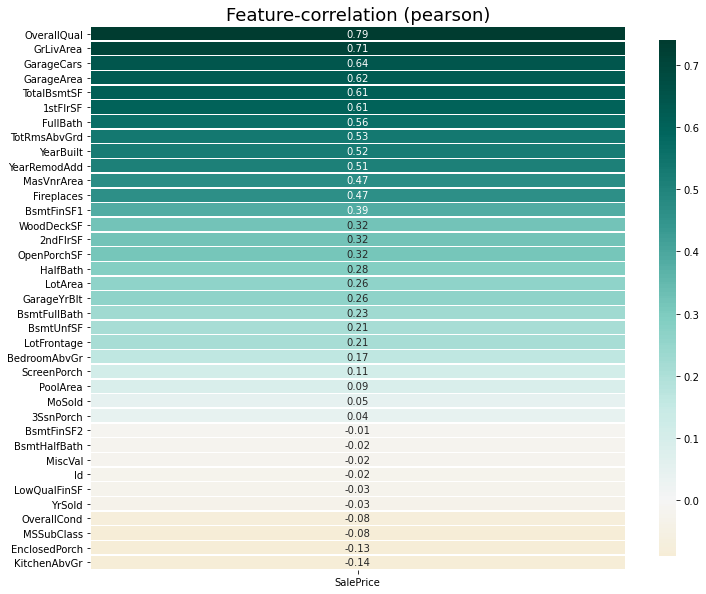

In [15]:
klib.corr_plot(df1, target='SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

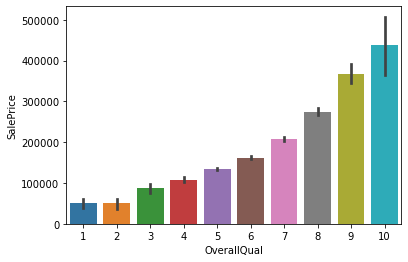

In [16]:
sns.barplot(x=df1["OverallQual"],y=df1["SalePrice"])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

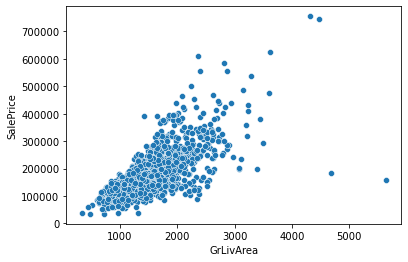

In [17]:
sns.scatterplot(x=df1["GrLivArea"],y=df1["SalePrice"])

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

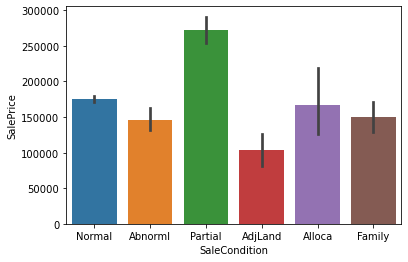

In [18]:
sns.barplot(x=df1["SaleCondition"],y=df1["SalePrice"])

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

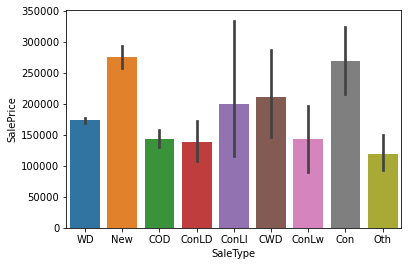

In [19]:
sns.barplot(x=df1["SaleType"],y=df1["SalePrice"])

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

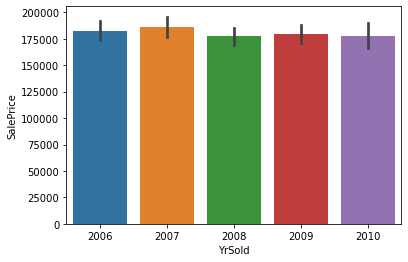

In [20]:
sns.barplot(x=df1["YrSold"],y=df1["SalePrice"])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

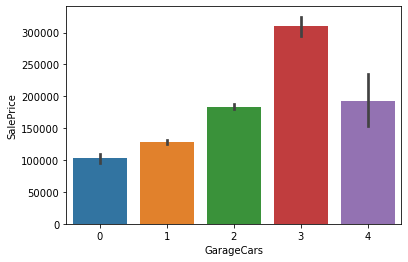

In [21]:
sns.barplot(x=df1["GarageCars"],y=df1["SalePrice"])

In [22]:
year_feature = [feature for feature in numeric_data if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [23]:
categorical_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


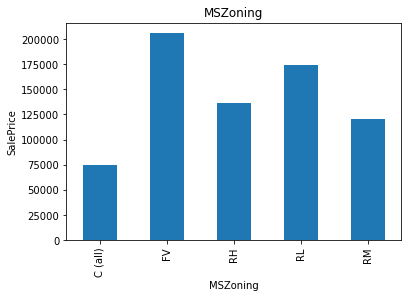

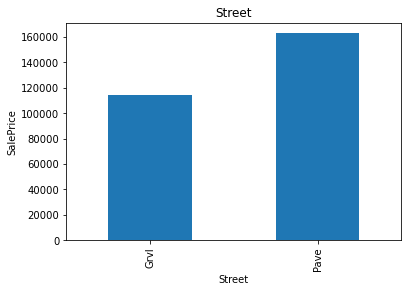

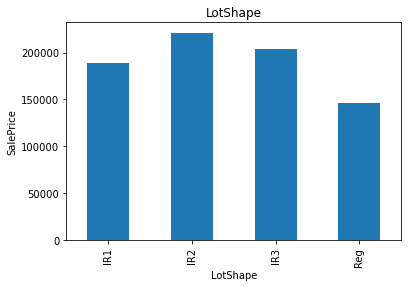

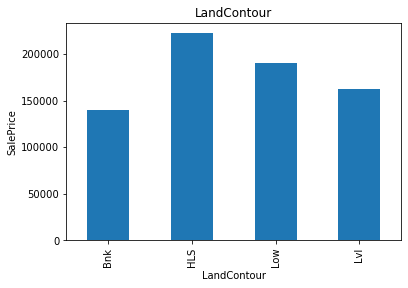

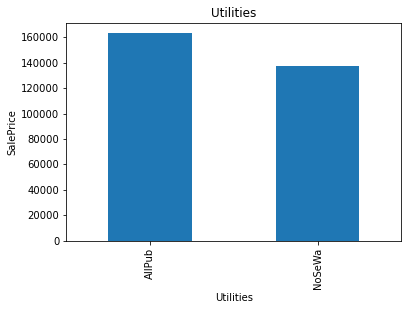

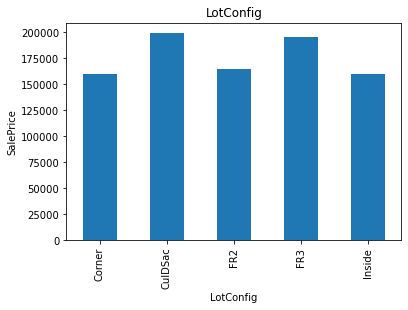

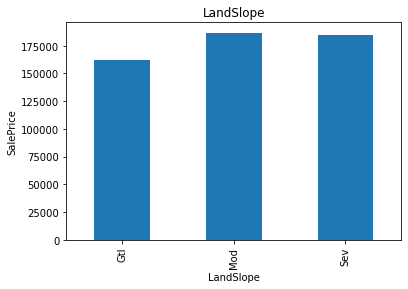

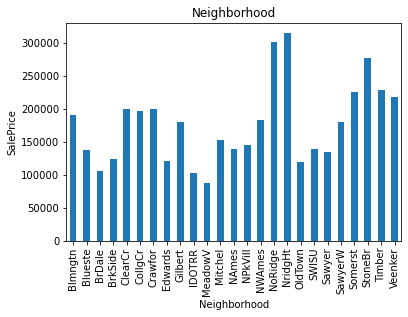

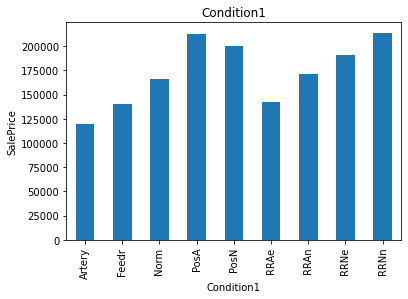

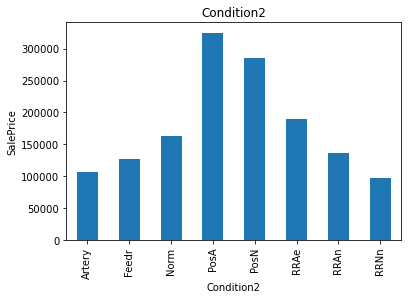

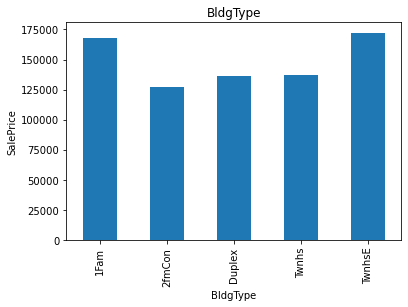

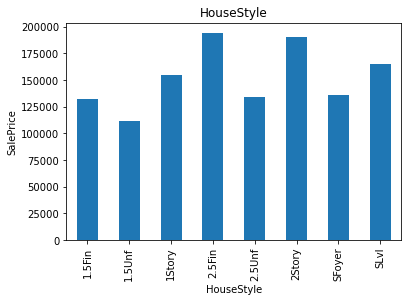

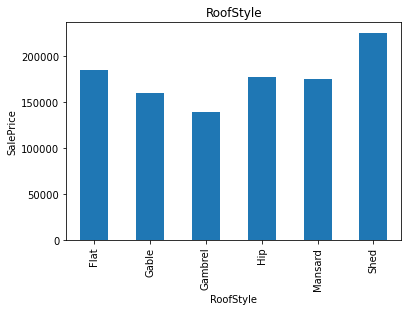

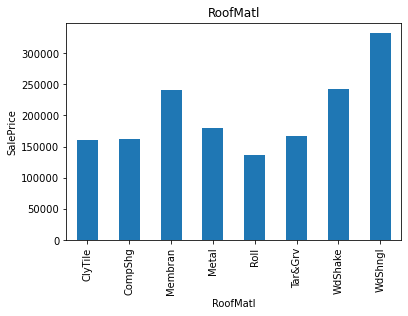

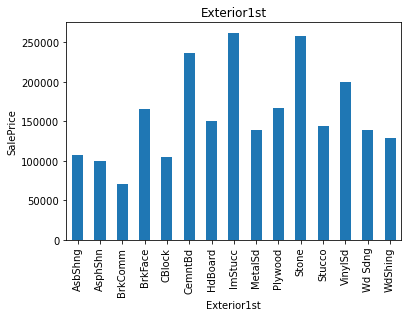

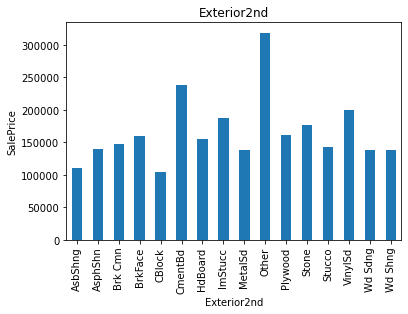

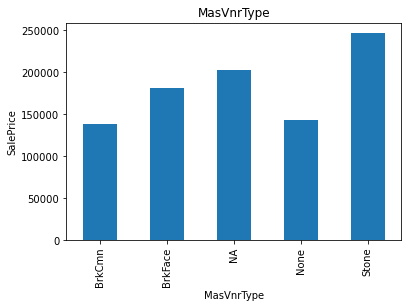

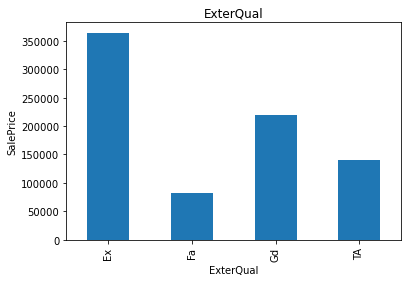

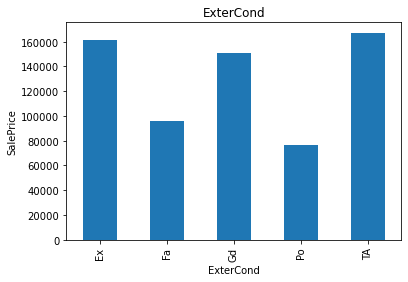

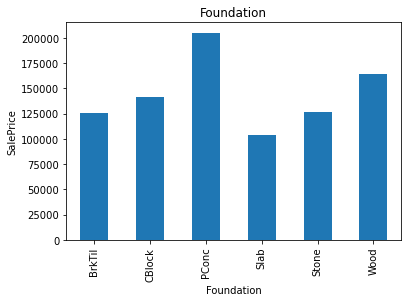

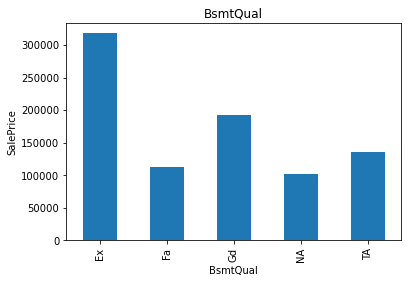

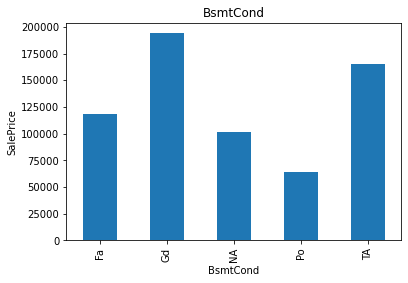

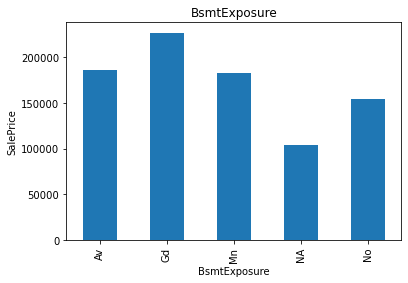

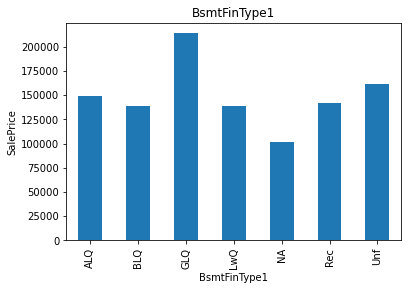

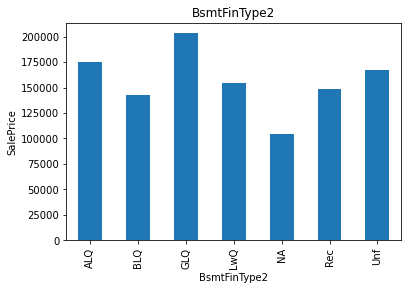

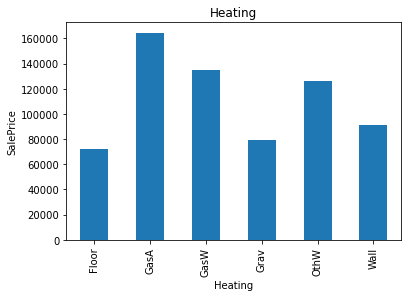

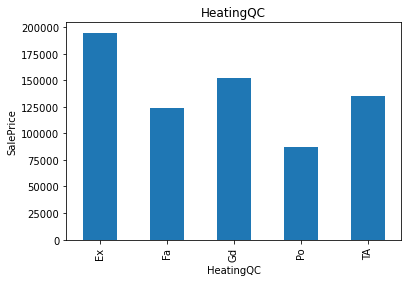

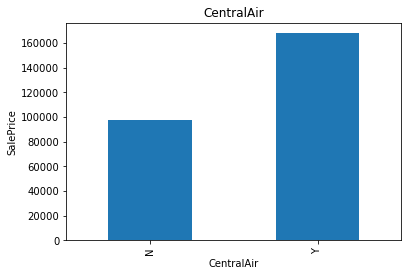

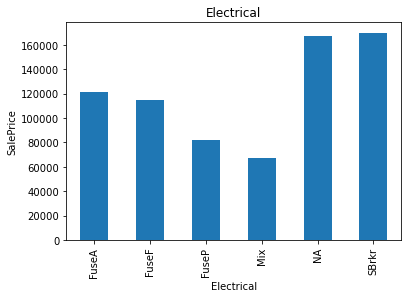

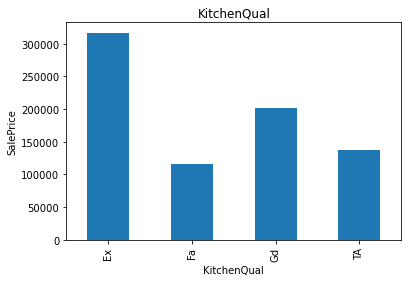

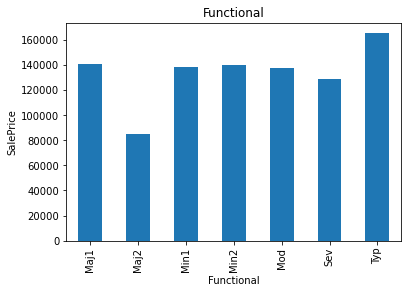

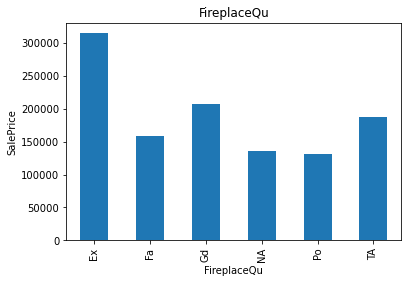

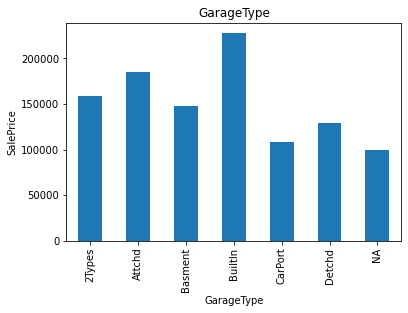

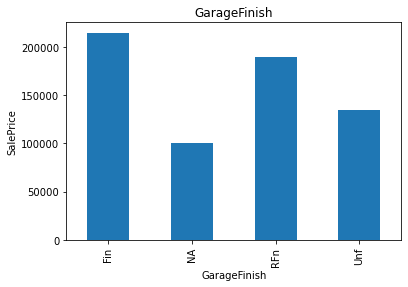

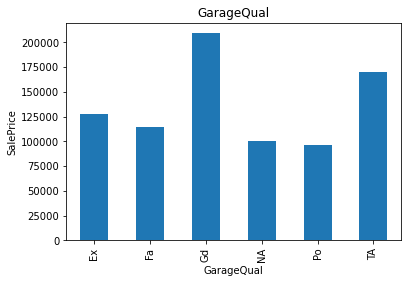

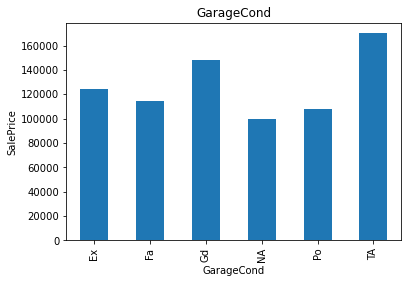

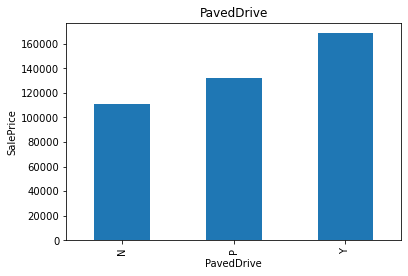

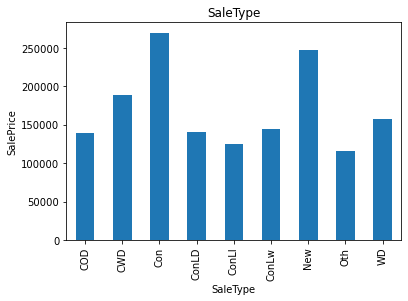

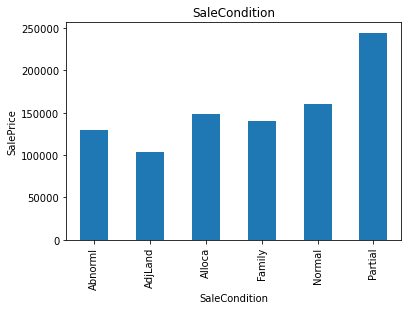

In [24]:
for feature in categorical_data:
    data=df1.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

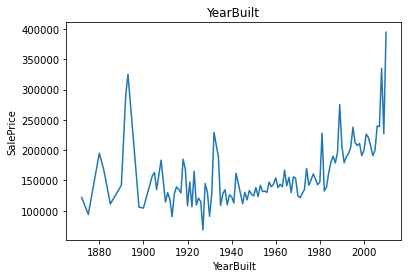

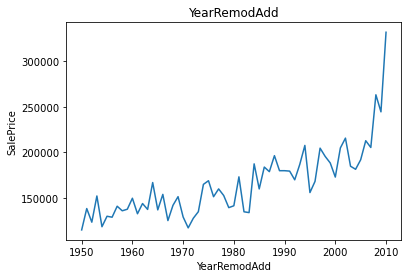

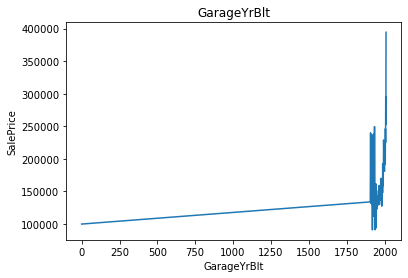

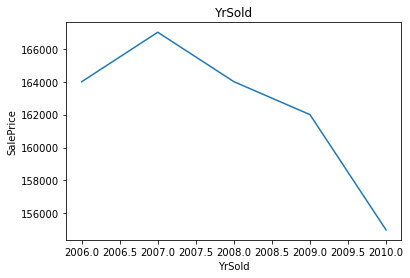

In [25]:
for feature in year_feature:
    data=df1.copy()
    data.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [26]:
df1.drop(["Id","YrSold","YearRemodAdd","GarageYrBlt","MasVnrArea","LotFrontage","BsmtFinSF2","BsmtUnfSF","FireplaceQu"],inplace=True,axis=1)

In [27]:
df1.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000


In [28]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in df1.columns:
    if isinstance(df1[i][0], str):
            df1[i] = encoder.fit_transform(df1[i])

In [29]:
X=df1.drop("SalePrice",axis=1)
y=df1["SalePrice"]

In [30]:
X

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,1,1,12,13,1,2,4,2,2,4,4,2,706,6,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2,2,548,5,5,2,0,61,0,0,0,0,0,2,8,4
1,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1,1,8,8,3,3,4,1,2,4,1,0,978,6,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,2,2,460,5,5,2,298,0,0,0,0,0,0,5,8,4
2,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,1,1,12,13,1,2,4,2,2,4,2,2,486,6,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2,2,608,5,5,2,0,42,0,0,0,0,0,9,8,4
3,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1,1,13,15,3,3,4,0,4,1,4,0,216,6,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,3,3,642,5,5,2,0,35,272,0,0,0,0,2,8,0
4,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,1,1,12,13,1,2,4,2,2,4,0,2,655,6,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2,3,836,5,5,2,192,84,0,0,0,0,0,12,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,1,1,12,13,3,3,4,2,2,4,4,6,0,6,953,1,0,1,5,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,1,2,2,460,5,5,2,0,40,0,0,0,0,0,8,8,4
1456,20,3,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1,1,9,10,4,3,4,1,2,4,4,0,790,5,1542,1,4,1,5,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,1,3,2,500,5,5,2,349,0,0,0,0,0,0,2,8,4
1457,70,3,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,1,1,5,5,3,0,2,4,4,1,4,2,275,6,1152,1,0,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1,2,1,252,5,5,2,0,60,0,0,0,0,2500,5,8,4
1458,20,3,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,3,1,8,8,3,3,4,1,4,4,2,2,49,5,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,3,1,240,5,5,2,366,0,112,0,0,0,0,4,8,4


In [31]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [32]:
X.shape

(1460, 67)

In [33]:
y.shape

(1460,)

# Training and model 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=31)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_model=LinearRegression()

In [38]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [39]:
lin_model.score(X_test,y_test)

0.826869032380648

In [40]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(learning_rate = 0.1, n_estimators=1000)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8416370564413463

In [41]:
pred =reg.predict(X_test)
pred[:5] 

array([205598.01453691, 130638.79080997, 125270.93222945, 154714.94482327,
       117955.81232661])

# Working with test dataset

In [42]:
df2=pd.read_csv("test1.csv")

In [43]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Handling Missing Values in Data

In [44]:
df2.isnull().sum().sort_values(ascending=False).head(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
BedroomAbvGr       0
dtype: int64

In [45]:
df2 = df2.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)

In [46]:
#separating the data acc to dtypes
numeric_data = df2.select_dtypes(include=[np.number])
categorical_data = df2.select_dtypes(exclude=[np.number])

In [47]:
#filling null values 
for c in categorical_data.columns:
    df2[c].fillna('NA', inplace=True)
    
df2['MasVnrType'].fillna('None', inplace=True)    

In [48]:
for c in numeric_data.columns:
    df2[c].fillna(0, inplace=True)

In [49]:
df2.isnull().sum().sort_values(ascending=False).head(35)

Id               0
GarageType       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
FireplaceQu      0
GarageYrBlt      0
HeatingQC        0
GarageFinish     0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
dtype: int64

# Visualizing the test dataset

In [50]:
klib.corr_mat(df2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.00,0.00,0.05,-0.06,0.01,-0.06,-0.08,-0.02,-0.05,0.02,0.00,-0.04,-0.02,-0.01,-0.02,-0.03,-0.03,0.01,-0.06,-0.05,0.00,-0.02,0.00,-0.04,-0.02,-0.06,-0.05,0.02,-0.00,0.02,-0.03,0.03,0.05,-0.01,0.14,-0.97
MSSubClass,0.00,1.00,-0.36,0.03,-0.07,0.04,0.05,-0.01,-0.06,-0.08,-0.11,-0.20,-0.25,0.31,0.01,0.07,0.02,-0.00,0.15,0.18,0.01,0.24,0.04,-0.06,-0.13,-0.05,-0.11,-0.02,-0.03,-0.03,-0.03,-0.07,-0.02,-0.05,0.01,-0.01
LotArea,0.05,-0.36,1.00,0.11,-0.10,0.05,0.04,0.19,0.19,0.05,0.07,0.28,0.46,-0.01,-0.01,0.37,0.09,-0.01,0.15,0.08,0.18,-0.03,0.29,0.28,0.09,0.26,0.32,0.16,0.16,0.10,-0.00,0.09,0.14,0.14,0.01,-0.05
OverallQual,-0.06,0.03,0.11,1.00,-0.10,0.62,0.59,0.45,0.32,-0.03,0.24,0.56,0.48,0.20,-0.07,0.56,0.22,-0.04,0.51,0.27,0.05,-0.13,0.35,0.38,0.27,0.60,0.57,0.27,0.29,-0.16,0.00,0.02,-0.01,0.03,-0.01,-0.01
OverallCond,0.01,-0.07,-0.10,-0.10,1.00,-0.36,0.02,-0.14,-0.06,0.04,-0.14,-0.18,-0.17,-0.02,-0.01,-0.16,-0.03,0.05,-0.24,-0.12,-0.03,-0.09,-0.13,-0.04,0.04,-0.18,-0.16,0.04,-0.10,0.07,0.07,0.03,-0.04,0.01,-0.01,0.02
YearBuilt,-0.06,0.04,0.05,0.62,-0.36,1.00,0.63,0.30,0.31,-0.01,0.11,0.43,0.34,0.03,-0.10,0.29,0.24,-0.02,0.47,0.30,-0.04,-0.10,0.13,0.19,0.25,0.54,0.48,0.23,0.21,-0.36,-0.01,-0.03,-0.00,0.01,0.02,-0.01
YearRemodAdd,-0.08,0.05,0.04,0.59,0.02,0.63,1.00,0.21,0.18,-0.06,0.15,0.31,0.24,0.18,-0.06,0.35,0.15,-0.08,0.48,0.24,-0.00,-0.14,0.20,0.15,0.15,0.43,0.38,0.23,0.26,-0.24,0.03,-0.05,-0.03,0.00,0.01,0.03
MasVnrArea,-0.02,-0.01,0.19,0.45,-0.14,0.30,0.21,1.00,0.34,0.04,0.06,0.43,0.44,0.06,-0.05,0.41,0.20,0.01,0.24,0.18,0.05,-0.07,0.27,0.30,0.12,0.35,0.37,0.17,0.16,-0.11,0.01,0.07,-0.01,0.11,0.00,-0.03
BsmtFinSF1,-0.05,-0.06,0.19,0.32,-0.06,0.31,0.18,0.34,1.00,-0.06,-0.46,0.55,0.47,-0.19,-0.07,0.22,0.63,0.09,0.11,-0.02,-0.12,-0.09,0.06,0.33,0.14,0.29,0.32,0.24,0.14,-0.10,0.09,0.13,0.01,0.17,0.01,0.03
BsmtFinSF2,0.02,-0.08,0.05,-0.03,0.04,-0.01,-0.06,0.04,-0.06,1.00,-0.26,0.08,0.07,-0.10,-0.02,-0.02,0.17,0.12,-0.07,-0.03,-0.04,-0.03,-0.06,0.08,0.06,0.01,0.02,0.13,-0.01,0.03,-0.01,0.04,0.05,-0.01,-0.00,-0.01


<AxesSubplot:xlabel='GarageType', ylabel='count'>

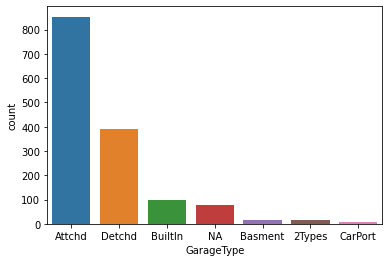

In [51]:
sns.countplot(df2.GarageType)

<AxesSubplot:xlabel='Functional', ylabel='count'>

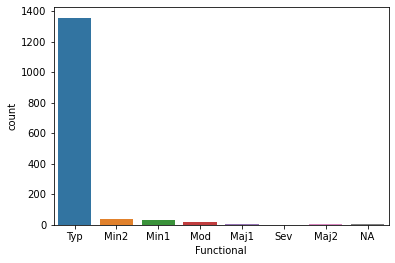

In [52]:
sns.countplot(df2.Functional)

<AxesSubplot:xlabel='Electrical', ylabel='count'>

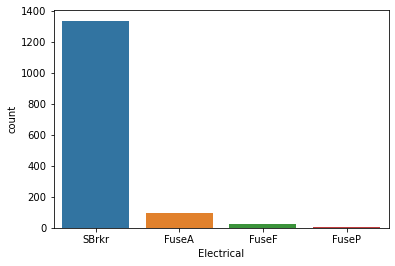

In [53]:
sns.countplot(x="Electrical", data=df2)

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

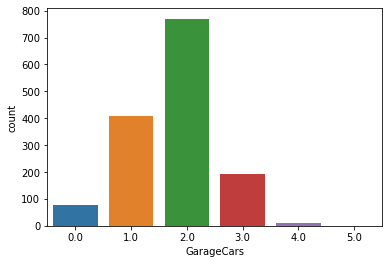

In [54]:
sns.countplot(x="GarageCars", data=df2)

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

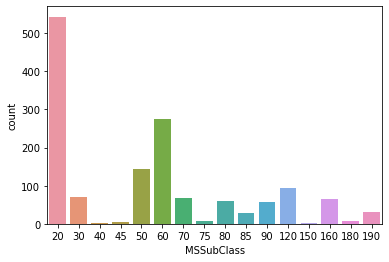

In [55]:
sns.countplot(df2.MSSubClass)

<AxesSubplot:xlabel='Street', ylabel='count'>

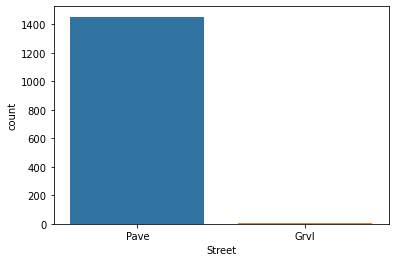

In [56]:
sns.countplot(df2.Street)

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

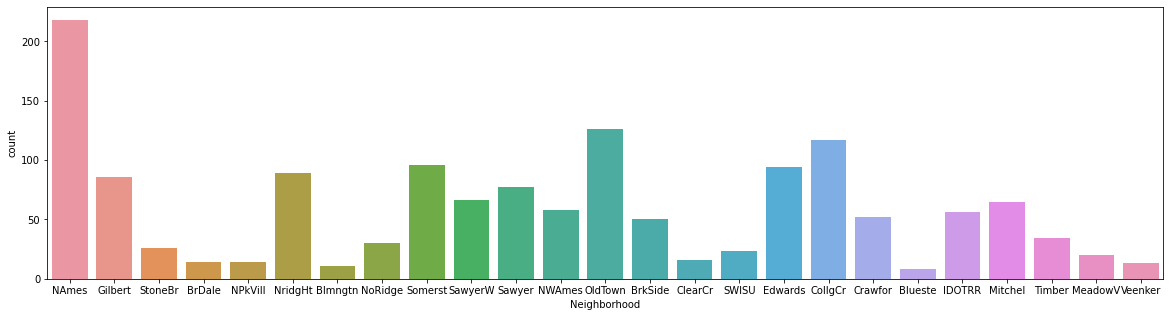

In [57]:
plt.figure(figsize=(20,5))
sns.countplot(df2.Neighborhood)

<AxesSubplot:xlabel='SaleCondition'>

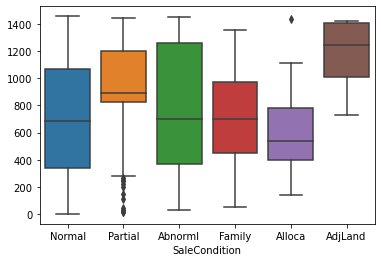

In [58]:
sns.boxplot(x=df2.SaleCondition,y=df2.index)

In [59]:
df2.drop("Id",axis=1,inplace=True)

In [60]:
df2.drop(["YearRemodAdd","MasVnrArea","YrSold","GarageYrBlt","BsmtFinSF2","BsmtUnfSF","FireplaceQu"],axis=1,inplace=True)

In [61]:
df2.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,WD,Normal


In [62]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in df2.columns:
    if isinstance(df2[i][0], str):
            df2[i] = encoder.fit_transform(df2[i])

In [63]:
df2

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
0,20,3,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1,0,11,13,3,3,4,1,4,4,4,5,468.0,3,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,1,3,1.0,730.0,4,5,2,140,0,0,0,120,0,0,6,9,4
1,20,4,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,3,0,12,14,1,3,4,1,4,4,4,0,923.0,6,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,7,0,1,3,1.0,312.0,4,5,2,393,36,0,0,0,0,12500,6,9,4
2,60,4,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1,0,11,13,3,3,4,2,2,4,4,2,791.0,6,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,1,0,2.0,482.0,4,5,2,212,34,0,0,0,0,0,3,9,4
3,60,4,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1,0,11,13,1,3,4,2,4,4,4,2,602.0,6,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,7,1,1,0,2.0,470.0,4,5,2,360,36,0,0,0,0,0,6,9,4
4,120,4,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1,0,6,6,3,2,4,2,2,4,4,0,263.0,6,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,7,0,1,2,2.0,506.0,4,5,2,0,82,0,0,144,0,0,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,5,1936,1,3,3,0,4,0,10,2,2,3,4,4,7,1970,1,0,5,5,3,3,4,1,4,4,4,6,0.0,6,546.0,0,2,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,4,5,7,0,6,1,0.0,0.0,2,3,2,0,0,0,0,0,0,0,6,9,4
1455,160,5,1894,1,3,3,0,4,0,10,2,2,4,4,4,5,1970,1,0,5,5,3,3,4,1,4,4,4,5,252.0,6,546.0,0,4,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,4,6,7,0,4,3,1.0,286.0,4,5,2,0,24,0,0,0,0,0,4,9,0
1456,20,4,20000,1,3,3,0,4,0,11,2,2,0,2,5,7,1960,1,0,11,13,3,3,4,1,4,4,4,0,1224.0,6,1224.0,0,0,1,3,1224,0,0,1224,1.0,0.0,1,0,4,1,4,7,7,1,5,3,2.0,576.0,4,5,2,474,0,0,0,0,0,0,9,9,0
1457,85,4,10441,1,3,3,0,4,0,11,2,2,0,5,5,5,1992,1,0,6,15,3,3,4,2,2,4,0,2,337.0,6,912.0,0,4,1,3,970,0,0,970,0.0,1.0,1,0,3,1,4,6,7,0,6,1,0.0,0.0,2,3,2,80,32,0,0,0,0,700,7,9,4


In [64]:
x1=df2

In [65]:
#assing the value of predicted output from train dataset
new_y=reg.predict(x1)

In [66]:
#adding dependent variable in test dataset
df2["SalePrice"]=new_y

In [67]:
df2

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,20,3,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1,0,11,13,3,3,4,1,4,4,4,5,468.0,3,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,1,3,1.0,730.0,4,5,2,140,0,0,0,120,0,0,6,9,4,121982.411404
1,20,4,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,3,0,12,14,1,3,4,1,4,4,4,0,923.0,6,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,7,0,1,3,1.0,312.0,4,5,2,393,36,0,0,0,0,12500,6,9,4,165710.154498
2,60,4,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1,0,11,13,3,3,4,2,2,4,4,2,791.0,6,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,1,0,2.0,482.0,4,5,2,212,34,0,0,0,0,0,3,9,4,169211.070142
3,60,4,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1,0,11,13,1,3,4,2,4,4,4,2,602.0,6,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,7,1,1,0,2.0,470.0,4,5,2,360,36,0,0,0,0,0,6,9,4,180833.049047
4,120,4,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1,0,6,6,3,2,4,2,2,4,4,0,263.0,6,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,7,0,1,2,2.0,506.0,4,5,2,0,82,0,0,144,0,0,1,9,4,199876.181979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,5,1936,1,3,3,0,4,0,10,2,2,3,4,4,7,1970,1,0,5,5,3,3,4,1,4,4,4,6,0.0,6,546.0,0,2,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,4,5,7,0,6,1,0.0,0.0,2,3,2,0,0,0,0,0,0,0,6,9,4,81782.941465
1455,160,5,1894,1,3,3,0,4,0,10,2,2,4,4,4,5,1970,1,0,5,5,3,3,4,1,4,4,4,5,252.0,6,546.0,0,4,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,4,6,7,0,4,3,1.0,286.0,4,5,2,0,24,0,0,0,0,0,4,9,0,73243.126851
1456,20,4,20000,1,3,3,0,4,0,11,2,2,0,2,5,7,1960,1,0,11,13,3,3,4,1,4,4,4,0,1224.0,6,1224.0,0,0,1,3,1224,0,0,1224,1.0,0.0,1,0,4,1,4,7,7,1,5,3,2.0,576.0,4,5,2,474,0,0,0,0,0,0,9,9,0,149692.189979
1457,85,4,10441,1,3,3,0,4,0,11,2,2,0,5,5,5,1992,1,0,6,15,3,3,4,2,2,4,0,2,337.0,6,912.0,0,4,1,3,970,0,0,970,0.0,1.0,1,0,3,1,4,6,7,0,6,1,0.0,0.0,2,3,2,80,32,0,0,0,0,700,7,9,4,125963.187449


<AxesSubplot:>

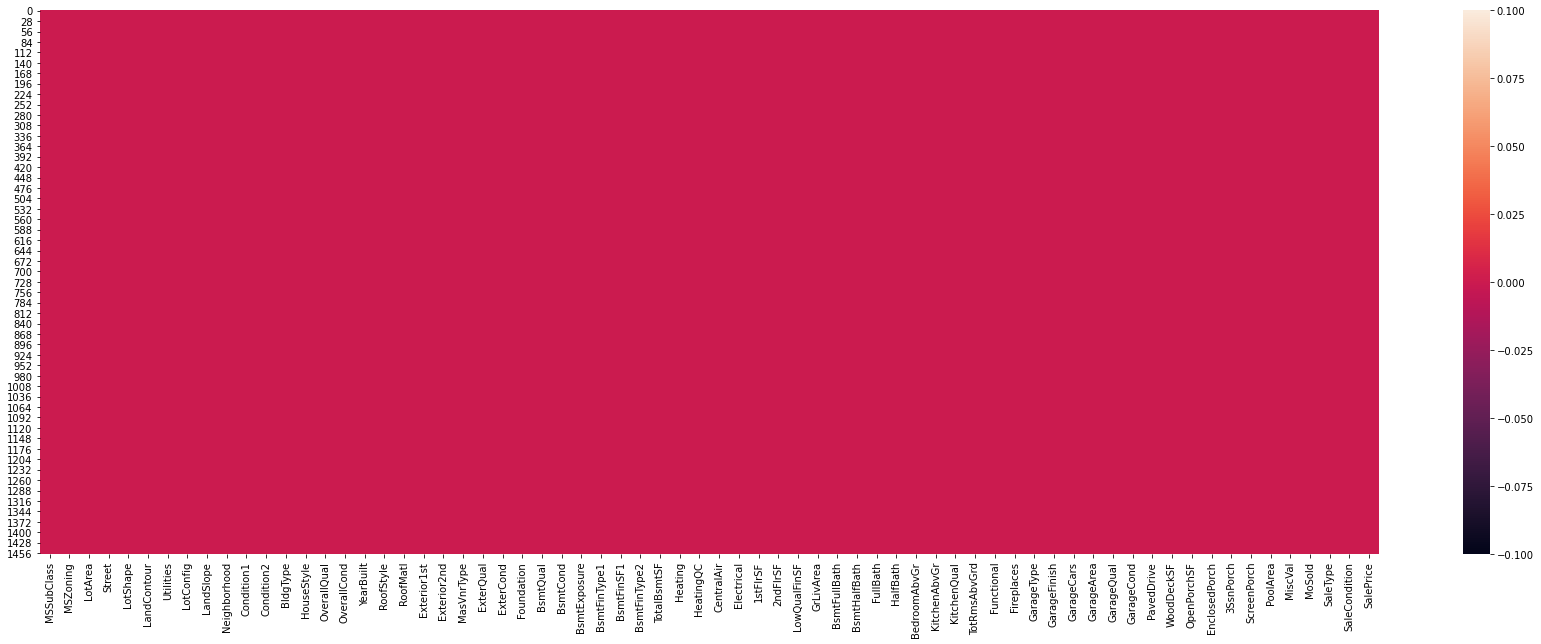

In [68]:
#checking null values
plt.figure(figsize=(30,10))
sns.heatmap(df2.isnull())

In [69]:
new_data=[df1,df2]

In [70]:
#merge both train and test dataset
new_data=pd.concat(new_data)

In [71]:
new_data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,1,1,12,13,1,2,4,2,2,4,4,2,706.0,6,856.0,1,0,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,2,2.0,548.0,5,5,2,0,61,0,0,0,0,0,2,8,4,208500.000000
1,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1,1,8,8,3,3,4,1,2,4,1,0,978.0,6,1262.0,1,0,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,1,2,2.0,460.0,5,5,2,298,0,0,0,0,0,0,5,8,4,181500.000000
2,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,1,1,12,13,1,2,4,2,2,4,2,2,486.0,6,920.0,1,0,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,1,2,2.0,608.0,5,5,2,0,42,0,0,0,0,0,9,8,4,223500.000000
3,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1,1,13,15,3,3,4,0,4,1,4,0,216.0,6,756.0,1,2,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,5,3,3.0,642.0,5,5,2,0,35,272,0,0,0,0,2,8,0,140000.000000
4,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,1,1,12,13,1,2,4,2,2,4,0,2,655.0,6,1145.0,1,0,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,1,2,3.0,836.0,5,5,2,192,84,0,0,0,0,0,12,8,4,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,5,1936,1,3,3,0,4,0,10,2,2,3,4,4,7,1970,1,0,5,5,3,3,4,1,4,4,4,6,0.0,6,546.0,0,2,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,4,5,7,0,6,1,0.0,0.0,2,3,2,0,0,0,0,0,0,0,6,9,4,81782.941465
1455,160,5,1894,1,3,3,0,4,0,10,2,2,4,4,4,5,1970,1,0,5,5,3,3,4,1,4,4,4,5,252.0,6,546.0,0,4,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,4,6,7,0,4,3,1.0,286.0,4,5,2,0,24,0,0,0,0,0,4,9,0,73243.126851
1456,20,4,20000,1,3,3,0,4,0,11,2,2,0,2,5,7,1960,1,0,11,13,3,3,4,1,4,4,4,0,1224.0,6,1224.0,0,0,1,3,1224,0,0,1224,1.0,0.0,1,0,4,1,4,7,7,1,5,3,2.0,576.0,4,5,2,474,0,0,0,0,0,0,9,9,0,149692.189979
1457,85,4,10441,1,3,3,0,4,0,11,2,2,0,5,5,5,1992,1,0,6,15,3,3,4,2,2,4,0,2,337.0,6,912.0,0,4,1,3,970,0,0,970,0.0,1.0,1,0,3,1,4,6,7,0,6,1,0.0,0.0,2,3,2,80,32,0,0,0,0,700,7,9,4,125963.187449


In [72]:
new_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MiscVal          0
MoSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 68, dtype: int64

In [73]:
X=new_data.drop("SalePrice",axis=1)
y=new_data["SalePrice"]

# Training and Modeling

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [75]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
lin_model.score(X_test,y_test)

0.8817700347090981

In [76]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(learning_rate = 0.1, n_estimators=1000)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9408810133623219

In [77]:
pred=lin_model.predict(X_test)

In [78]:
pred[:5]

array([126159.13840811, 190928.52247292, 115157.58794426, 181874.96741867,
       106959.46369101])

In [79]:
pred_reg=reg.predict(X_test)

In [80]:
pred_reg[:5]

array([129445.26368569, 186456.46032023, 130505.69778904, 187399.44632189,
       116298.99570442])

In [86]:
from sklearn import ensemble
classifier = ensemble.RandomForestRegressor(n_estimators=150)
classifier.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [87]:
classifier.score(X_test,y_test)

0.9225147636038035